# Koda za projektno nalogo PR
## Tehnični pregledi motornih vozil v Sloveniji

### Skupina
* Leon Macur - 63180190
* Kevin Mohar - 63180209

### Podatki
podatki -> (OPSI: odprti podatki) https://podatki.gov.si/dataset/rezultati-tehnicnih-pregledov-motornih-vozil \
datoteke -> Porocilo o uspesnosti tp (2019, 2018, 2017, 2016, 2015) \
txt -> tp-2019 \
csv -> tp-(2018, 2017, 2016, 2015)

### Organizacija in branje podatkov:

In [1]:
from datetime import datetime
from csv import DictReader
import numpy as np
import matplotlib.pyplot as plt
import operator
import re

def getDat(datoteka):
    dat = []
    i = 0
    with open(datoteka, "r", encoding="utf8") as datRead:
        for datLine in datRead.readlines():
            dat += [[]]
            for beseda in datLine.split(";"):
                dat[i].append(beseda.strip("\"\n"))
            i += 1
    datRead.close()
    return dat

# dats = [2019, 2018, 2017, 2016, 2015]
dats = [getDat('podatki/Porocilo_o_uspesnosti_tp_2019.txt'), getDat('podatki/Porocilo_o_uspesnosti_tp_2018.csv'),
        getDat('podatki/Porocilo_o_uspesnosti_tp_2017.csv'), getDat('podatki/Porocilo_o_uspesnosti_tp_2016.csv'), 
        getDat('podatki/Porocilo_o_uspesnosti_tp_2015.csv')]

# dat[0] <- header
# dat[#>0] <- vrstica (podatki) o vozilu

#### Vpr1:
Kakšno je razmerje med opravljenim in neopravljenim pregledom gleda na število prevoženih kilometrov osebnih vozil.

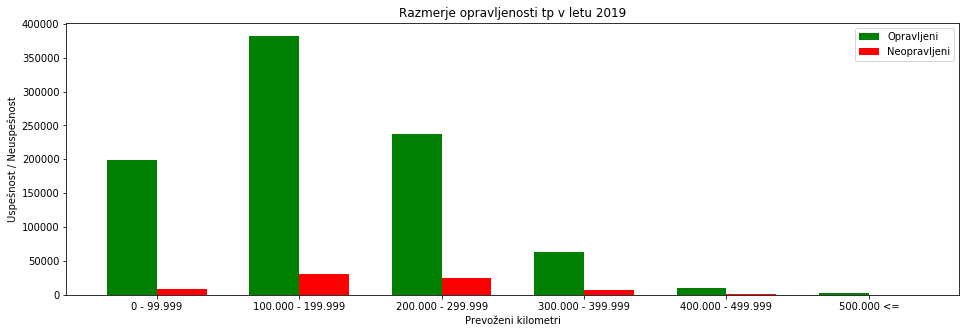

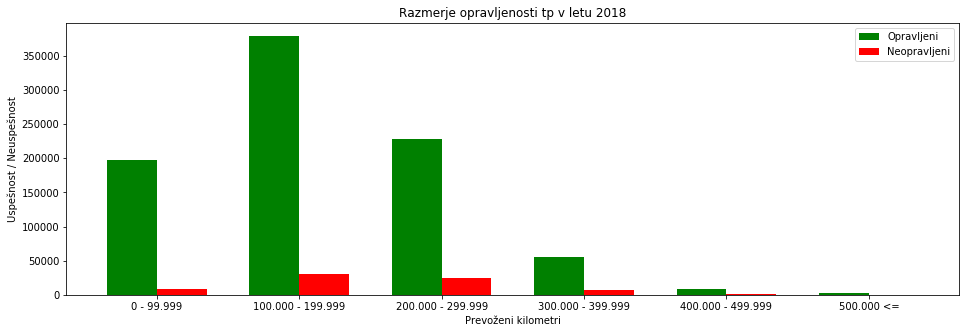

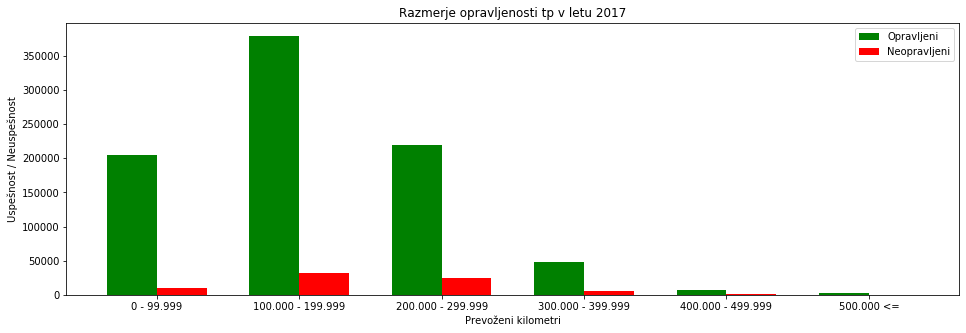

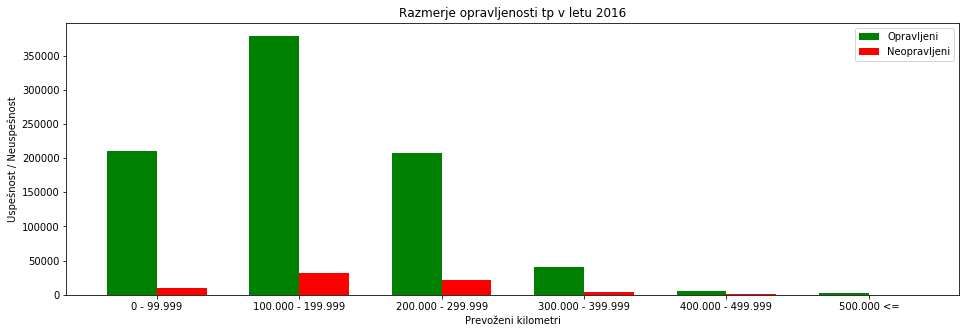

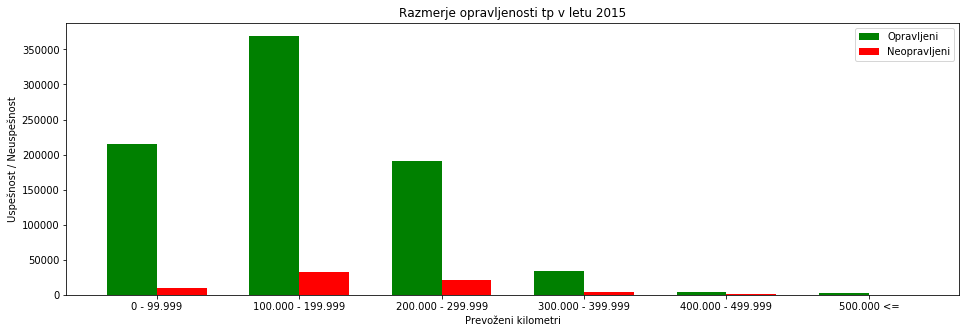

In [2]:
# dat[#>0][7] <- Kategorija vozila
# dat[#>0][16] <- Prevoženi kilometri
# dat[#>0][21] <- Status tehničnega pregleda

for range_dat in range(5):
    vozOpr = [0, 0, 0, 0, 0, 0]
    vozNpr = [0, 0, 0, 0, 0, 0]
    for vozilo in dats[range_dat]:
        try:
            if vozilo[21] != "" and vozilo[7] == "osebni avtomobil":
                # Ali je vozilo opravil tp
                if vozilo[21] == "brezhiben" or vozilo[21] == "pogojno brezhiben":
                    if 0 <= int(vozilo[16]) < 100000:
                        vozOpr[0] += 1
                    elif 100000 <= int(vozilo[16]) < 200000:
                        vozOpr[1] += 1
                    elif 200000 <= int(vozilo[16]) < 300000:
                        vozOpr[2] += 1
                    elif 300000 <= int(vozilo[16]) < 400000:
                        vozOpr[3] += 1
                    elif 400000 <= int(vozilo[16]) < 500000:
                        vozOpr[4] += 1
                    elif 500000 <= int(vozilo[16]):
                        vozOpr[5] += 1
                else:
                    if 0 <= int(vozilo[16]) < 100000:
                        vozNpr[0] += 1
                    elif 100000 <= int(vozilo[16]) < 200000:
                        vozNpr[1] += 1
                    elif 200000 <= int(vozilo[16]) < 300000:
                        vozNpr[2] += 1
                    elif 300000 <= int(vozilo[16]) < 400000:
                        vozNpr[3] += 1
                    elif 400000 <= int(vozilo[16]) < 500000:
                        vozNpr[4] += 1
                    elif 500000 <= int(vozilo[16]):
                        vozNpr[5] += 1
        except:
            pass
    
    rng = np.arange(len(vozOpr))
    vozRange = ["0 - 99.999", "100.000 - 199.999", "200.000 - 299.999", "300.000 - 399.999", "400.000 - 499.999", "500.000 <="]
    
    fig, ax = plt.subplots(figsize=(16, 5))
    ax.bar(rng, vozOpr, width=0.35, label="Opravljeni", color="green")
    ax.bar(rng+0.35, vozNpr, width=0.35, label="Neopravljeni", color="red")
    ax.set_title("Razmerje opravljenosti tp v letu " + str(2019-range_dat))
    ax.set_xlabel("Prevoženi kilometri")
    ax.set_xticks(rng + 0.35 / 2)
    ax.set_xticklabels(vozRange)
    ax.set_ylabel("Uspešnost / Neuspešnost")
    ax.legend()
    plt.show()

#### Vpr2:
Kakšno je razmerje med opravljenim in neopravljenim pregledom gleda na število prevoženih kilometrov osebnih vozil (vsa leta).

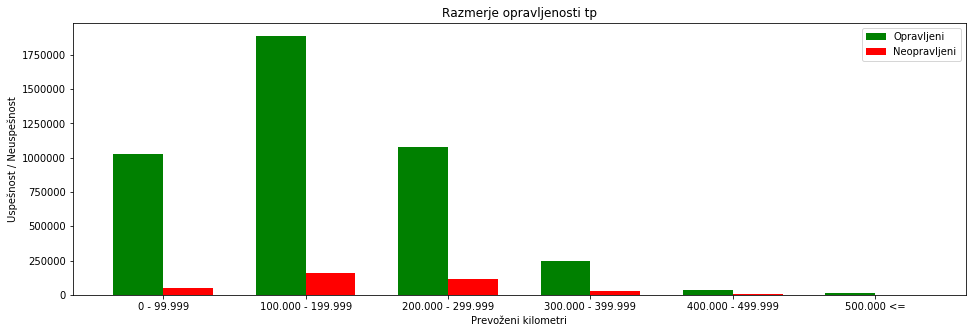

In [3]:
# dat[#>0][7] <- Kategorija vozila
# dat[#>0][16] <- Prevoženi kilometri
# dat[#>0][21] <- Status tehničnega pregleda

vozOpr = [0, 0, 0, 0, 0, 0]
vozNpr = [0, 0, 0, 0, 0, 0]
for range_dat in range(5):
    for vozilo in dats[range_dat]:
        try:
            if vozilo[21] != "" and vozilo[7] == "osebni avtomobil":
                # Ali je vozilo opravil tp
                if vozilo[21] == "brezhiben" or vozilo[21] == "pogojno brezhiben":
                    if 0 <= int(vozilo[16]) < 100000:
                        vozOpr[0] += 1
                    elif 100000 <= int(vozilo[16]) < 200000:
                        vozOpr[1] += 1
                    elif 200000 <= int(vozilo[16]) < 300000:
                        vozOpr[2] += 1
                    elif 300000 <= int(vozilo[16]) < 400000:
                        vozOpr[3] += 1
                    elif 400000 <= int(vozilo[16]) < 500000:
                        vozOpr[4] += 1
                    elif 500000 <= int(vozilo[16]):
                        vozOpr[5] += 1
                else:
                    if 0 <= int(vozilo[16]) < 100000:
                        vozNpr[0] += 1
                    elif 100000 <= int(vozilo[16]) < 200000:
                        vozNpr[1] += 1
                    elif 200000 <= int(vozilo[16]) < 300000:
                        vozNpr[2] += 1
                    elif 300000 <= int(vozilo[16]) < 400000:
                        vozNpr[3] += 1
                    elif 400000 <= int(vozilo[16]) < 500000:
                        vozNpr[4] += 1
                    elif 500000 <= int(vozilo[16]):
                        vozNpr[5] += 1
        except:
            pass

rng = np.arange(len(vozOpr))
vozRange = ["0 - 99.999", "100.000 - 199.999", "200.000 - 299.999", "300.000 - 399.999", "400.000 - 499.999", "500.000 <="]

fig, ax = plt.subplots(figsize=(16, 5))
ax.bar(rng, vozOpr, width=0.35, label="Opravljeni", color="green")
ax.bar(rng+0.35, vozNpr, width=0.35, label="Neopravljeni", color="red")
ax.set_title("Razmerje opravljenosti tp")
ax.set_xlabel("Prevoženi kilometri")
ax.set_xticks(rng + 0.35 / 2)
ax.set_xticklabels(vozRange)
ax.set_ylabel("Uspešnost / Neuspešnost")
ax.legend()
plt.show()

#### Vpr3:
Kakšna je verjetnost opravljenega pregleda gleda na število prevoženih kilometrov osebnih vozil.

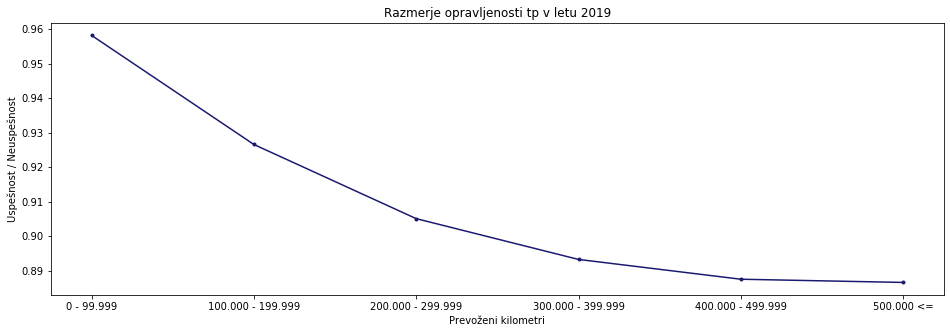

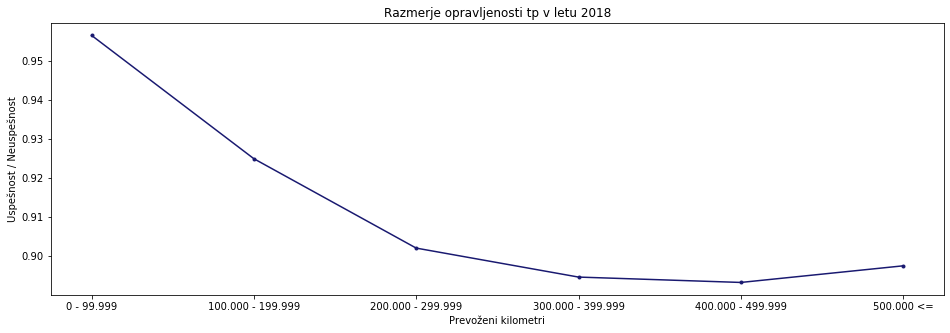

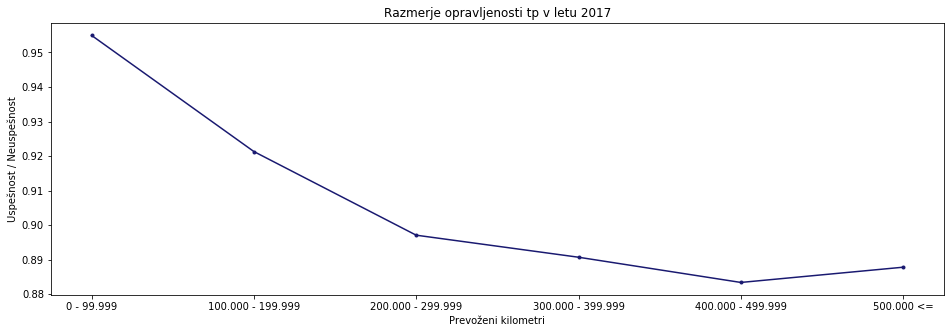

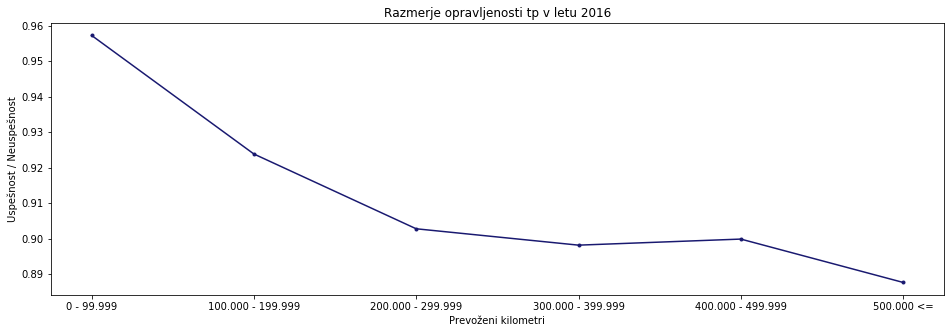

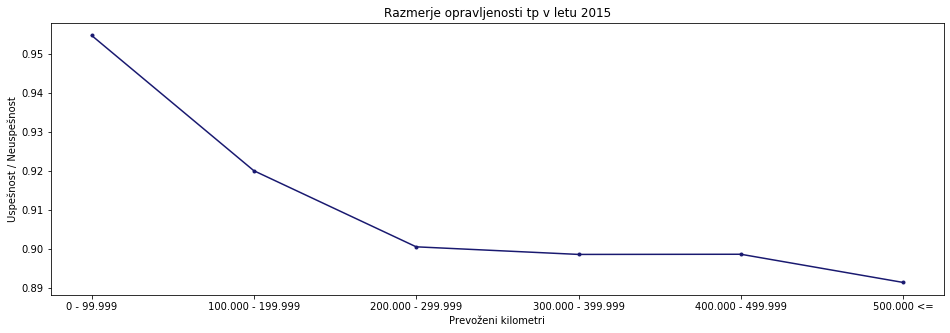

In [4]:
# dat[#>0][7] <- Kategorija vozila
# dat[#>0][16] <- Prevoženi kilometri
# dat[#>0][21] <- Status tehničnega pregleda

for range_dat in range(5):
    vozOpr = [0, 0, 0, 0, 0, 0]
    vozVsi = [0, 0, 0, 0, 0, 0]
    for vozilo in dats[range_dat]:
        try:
            if vozilo[21] != "" and vozilo[7] == "osebni avtomobil":
                # Ali je vozilo opravil tp
                if vozilo[21] == "brezhiben" or vozilo[21] == "pogojno brezhiben":
                    if 0 <= int(vozilo[16]) < 100000:
                        vozOpr[0] += 1
                        vozVsi[0] += 1
                    elif 100000 <= int(vozilo[16]) < 200000:
                        vozOpr[1] += 1
                        vozVsi[1] += 1
                    elif 200000 <= int(vozilo[16]) < 300000:
                        vozOpr[2] += 1
                        vozVsi[2] += 1
                    elif 300000 <= int(vozilo[16]) < 400000:
                        vozOpr[3] += 1
                        vozVsi[3] += 1
                    elif 400000 <= int(vozilo[16]) < 500000:
                        vozOpr[4] += 1
                        vozVsi[4] += 1
                    elif 500000 <= int(vozilo[16]):
                        vozOpr[5] += 1
                        vozVsi[5] += 1
                else:
                    if 0 <= int(vozilo[16]) < 100000:
                        vozVsi[0] += 1
                    elif 100000 <= int(vozilo[16]) < 200000:
                        vozVsi[1] += 1
                    elif 200000 <= int(vozilo[16]) < 300000:
                        vozVsi[2] += 1
                    elif 300000 <= int(vozilo[16]) < 400000:
                        vozVsi[3] += 1
                    elif 400000 <= int(vozilo[16]) < 500000:
                        vozVsi[4] += 1
                    elif 500000 <= int(vozilo[16]):
                        vozVsi[5] += 1
        except:
            pass
    
    vozPr = [vozOpr[0]/vozVsi[0], vozOpr[1]/vozVsi[1], vozOpr[2]/vozVsi[2], 
             vozOpr[3]/vozVsi[3], vozOpr[4]/vozVsi[4], vozOpr[5]/vozVsi[5]]
    rng = np.arange(len(vozPr))
    vozRange = ["0 - 99.999", "100.000 - 199.999", "200.000 - 299.999", "300.000 - 399.999", "400.000 - 499.999", "500.000 <="]
    
    fig, ax = plt.subplots(figsize=(16, 5))
    ax.plot(vozRange, vozPr, "k.", color="midnightblue")
    ax.plot(vozRange, vozPr, color="midnightblue")
    ax.set_title("Razmerje opravljenosti tp v letu " + str(2019-range_dat))
    ax.set_xlabel("Prevoženi kilometri")
    ax.set_ylabel("Uspešnost / Neuspešnost")
    plt.show()

#### Vpr4:
Kakšna je verjetnost opravljenega pregleda gleda na število prevoženih kilometrov osebnih vozil (vsa leta).

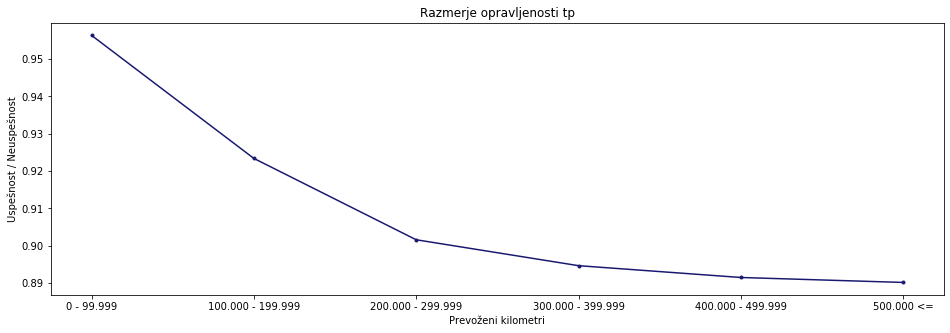

In [5]:
# dat[#>0][7] <- Kategorija vozila
# dat[#>0][16] <- Prevoženi kilometri
# dat[#>0][21] <- Status tehničnega pregleda

vozOpr = [0, 0, 0, 0, 0, 0]
vozVsi = [0, 0, 0, 0, 0, 0]
for range_dat in range(5):
    for vozilo in dats[range_dat]:
        try:
            if vozilo[21] != "" and vozilo[7] == "osebni avtomobil":
                # Ali je vozilo opravil tp
                if vozilo[21] == "brezhiben" or vozilo[21] == "pogojno brezhiben":
                    if 0 <= int(vozilo[16]) < 100000:
                        vozOpr[0] += 1
                        vozVsi[0] += 1
                    elif 100000 <= int(vozilo[16]) < 200000:
                        vozOpr[1] += 1
                        vozVsi[1] += 1
                    elif 200000 <= int(vozilo[16]) < 300000:
                        vozOpr[2] += 1
                        vozVsi[2] += 1
                    elif 300000 <= int(vozilo[16]) < 400000:
                        vozOpr[3] += 1
                        vozVsi[3] += 1
                    elif 400000 <= int(vozilo[16]) < 500000:
                        vozOpr[4] += 1
                        vozVsi[4] += 1
                    elif 500000 <= int(vozilo[16]):
                        vozOpr[5] += 1
                        vozVsi[5] += 1
                else:
                    if 0 <= int(vozilo[16]) < 100000:
                        vozVsi[0] += 1
                    elif 100000 <= int(vozilo[16]) < 200000:
                        vozVsi[1] += 1
                    elif 200000 <= int(vozilo[16]) < 300000:
                        vozVsi[2] += 1
                    elif 300000 <= int(vozilo[16]) < 400000:
                        vozVsi[3] += 1
                    elif 400000 <= int(vozilo[16]) < 500000:
                        vozVsi[4] += 1
                    elif 500000 <= int(vozilo[16]):
                        vozVsi[5] += 1
        except:
            pass

vozPr = [vozOpr[0]/vozVsi[0], vozOpr[1]/vozVsi[1], vozOpr[2]/vozVsi[2], 
         vozOpr[3]/vozVsi[3], vozOpr[4]/vozVsi[4], vozOpr[5]/vozVsi[5]]
rng = np.arange(len(vozPr))
vozRange = ["0 - 99.999", "100.000 - 199.999", "200.000 - 299.999", "300.000 - 399.999", "400.000 - 499.999", "500.000 <="]

fig, ax = plt.subplots(figsize=(16, 5))
ax.plot(vozRange, vozPr, "k.", color="midnightblue")
ax.plot(vozRange, vozPr, color="midnightblue")
ax.set_title("Razmerje opravljenosti tp")
ax.set_xlabel("Prevoženi kilometri")
ax.set_ylabel("Uspešnost / Neuspešnost")
plt.show()